# Quadrotor Ball System
by Sebastian Lopez-Cot

This python notebook can be used to run the quad-ball system. The quadrotor will try to send a ball to a desired location given initial conditions and will attempt to return to its original starting point.

Should end at:  [ 0.  0.]
Number of decision vars:  1200
Solve:  SolutionResult.kIterationLimit


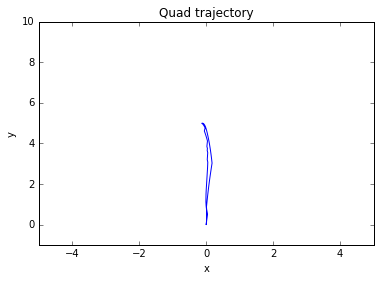

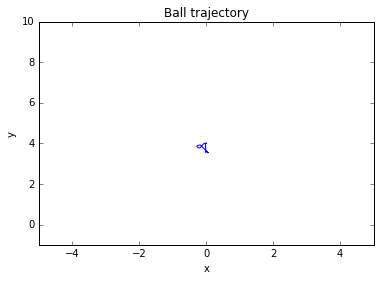

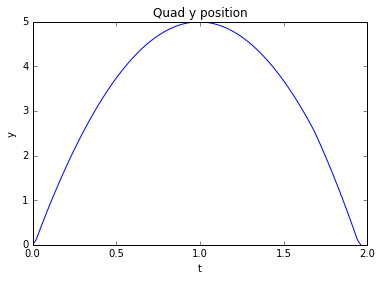

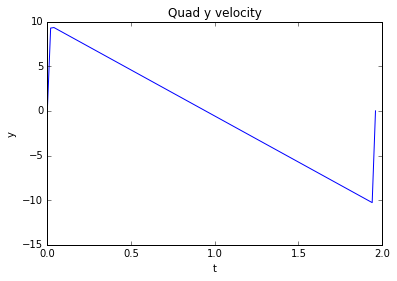

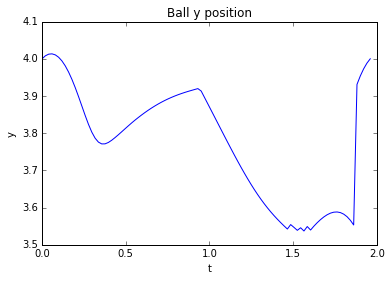

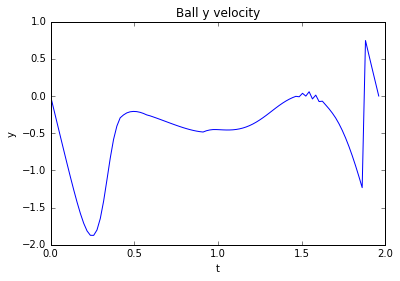

[[  4.77644091e+01   0.00000000e+00]
 [  1.33542667e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 

In [100]:
%reload_ext autoreload
%autoreload 2

import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import scipy as sp

from pydrake.all import MathematicalProgram
from pydrake.symbolic import (sin,cos,tanh)

from quad_ball_system import (BallQuadSystem, SystemVisualizer)

# Define the min and max time for the problem
min_time = 1.0
max_time = 5.0

# Quad initial conditions
initial_quad_state = np.zeros(6)
initial_quad_state[0] = 0.0
initial_quad_state[1] = 0.0
initial_quad_state[2] = 0.0
initial_quad_state[3] = 0.0
initial_quad_state[4] = 0.0
initial_quad_state[5] = 0.0

final_quad_state = np.zeros(6)
final_quad_state[0] = 0.0 #np.random.choice(np.arange(-4.0, 4.0, 0.1))
final_quad_state[1] = 0.0 #np.random.choice(np.arange(1.0, 2.0, 0.1))
final_quad_state[2] = 0.0
final_quad_state[3] = 0.0
final_quad_state[4] = 0.0
final_quad_state[5] = 0.0

print "Should end at: ", final_quad_state[0:2]

# Ball initial conditions (launched)
vlaunch = 11.5
theta = 60.0 * np.pi / 180.0

#initial_ball_state = np.zeros(4)
#initial_ball_state[0] = -2.0*(vlaunch)**2 * np.sin(theta) * np.cos(theta) / 9.81
#initial_ball_state[1] = 0.0
#initial_ball_state[2] = vlaunch * np.cos(theta)
#initial_ball_state[3] = vlaunch * np.sin(theta)

initial_ball_state = np.zeros(4)
initial_ball_state[0] = 0.0
initial_ball_state[1] = 4.0
initial_ball_state[2] = 0.0
initial_ball_state[3] = 0.0

# Ball final state conditions
final_ball_state = np.copy(initial_ball_state)
#final_ball_state[2:4] *= -1.0

# System params
quad_mass = 0.1
g = -9.81
beta = 1.0

# Run the solver
bqs = BallQuadSystem(quad_mass, g, beta)
quad_traj, ball_traj, input_traj, time_array = bqs.solve(initial_quad_state, final_quad_state, initial_ball_state, final_ball_state, min_time, max_time)

# Visualize the results
plt.figure()
plt.title("Quad trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5,5)
plt.ylim(-1,10)
plt.plot(quad_traj[:,0], quad_traj[:,1])
plt.show()

plt.figure()
plt.title("Ball trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5,5)
plt.ylim(-1,10)
plt.plot(ball_traj[:,0], ball_traj[:,1])
plt.show()

assert(time_array[0:100].shape == ball_traj[:,1].shape)

plt.figure()
plt.title("Quad y position")
plt.xlabel("t")
plt.ylabel("y")
plt.plot(time_array[0:100], quad_traj[:,1])
plt.show()

plt.figure()
plt.title("Quad y velocity")
plt.xlabel("t")
plt.ylabel("y")
plt.plot(time_array[0:100], quad_traj[:,4])
plt.show()

plt.figure()
plt.title("Ball y position")
plt.xlabel("t")
plt.ylabel("y")
plt.plot(time_array[0:100], ball_traj[:,1])
plt.show()

plt.figure()
plt.title("Ball y velocity")
plt.xlabel("t")
plt.ylabel("y")
plt.plot(time_array[0:100], ball_traj[:,3])
plt.show()

print input_traj